<a href="https://colab.research.google.com/github/mharcoshungria/python_for_finance/blob/main/taxas_retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.shortpixel.ai/spai/w_353+q_+ret_img+to_webp/https://iaexpert.academy/wp-content/uploads/2020/06/iaexpert-logo-1.png"  width="160">

# **Python para Finanças**

## Taxas de Retorno de Ações

#### Importação das Bibliotecas e Base de Dados:

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mharcoshungria/python_for_finance/main/datasets/acoes.csv')

In [3]:
dataset.shape

(1833, 7)

In [4]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1828,2022-05-13,14.51,13.06,26.500000,4.380000,26.459999,103.290001
1829,2022-05-16,14.61,13.06,26.200001,4.380000,26.120001,104.400002
1830,2022-05-17,15.27,13.05,26.910000,3.940000,26.690001,104.900002
1831,2022-05-18,14.80,12.59,26.430000,3.720000,26.459999,102.209999


#### Taxa de Retorno Simples:

In [18]:
len(dataset) # A função len() é uma das funções internas do Python, ela retorna o comprimento de um objeto

1833

In [19]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1] # Validando se está trazendo os valores corretos =)

(14.989999771118164, 14.899999618530272)

In [20]:
# Aplicando a fórmula de Retorno Simples:

# RS = (Valor Final - Valor Inicial) / Valor Inicial * 100
# Desta forma, teremos o % da Taxa de Retorno Simples =)

In [21]:
# Nos exemplos abaixo, estou considerando a compra da ação no dia 02/01/2015 e a venda no dia 19/06/2022.

((dataset['GOL'][len(dataset) - 1] - dataset['GOL'][0]) / dataset['GOL'][0]) * 100

-0.6004012939433082

In [22]:
((dataset['CVC'][len(dataset) - 1] - dataset['CVC'][0]) / dataset['CVC'][0]) * 100

-17.105259608033567

In [23]:
((dataset['WEGE'][len(dataset) - 1] - dataset['WEGE'][0]) / dataset['WEGE'][0]) * 100

331.0260416721175

In [24]:
((dataset['MGLU'][len(dataset) - 1] - dataset['MGLU'][0]) / dataset['MGLU'][0]) * 100

1502.1510842244074

In [25]:
((dataset['TOTS'][len(dataset) - 1] - dataset['TOTS'][0]) / dataset['TOTS'][0]) * 100

124.83982258058835

In [26]:
((dataset['BOVA'][len(dataset) - 1] - dataset['BOVA'][0]) / dataset['BOVA'][0]) * 100

118.11258038933966

In [27]:
# Podemos realizar este cálculo de outra forma, exemplo:

(dataset['BOVA'][len(dataset) - 1] / dataset['BOVA'][0] - 1) * 100

118.11258038933966

In [28]:
# Também é possível realizar o cálculo de Retorno Simples por dia: 

dataset['GOL']

0       14.99
1       14.85
2       15.21
3       14.55
4       14.27
        ...  
1828    14.51
1829    14.61
1830    15.27
1831    14.80
1832    14.90
Name: GOL, Length: 1833, dtype: float64

In [29]:
dataset['GOL'].shift(1) # Usaremos a função shift() que desloca o índice pelo número desejado de períodos com uma frequência de tempo opcional.

0         NaN
1       14.99
2       14.85
3       15.21
4       14.55
        ...  
1828    12.98
1829    14.51
1830    14.61
1831    15.27
1832    14.80
Name: GOL, Length: 1833, dtype: float64

In [30]:
# Na coluna "RS GOL" teremos o RS diário.

dataset['RS GOL'] = (dataset['GOL'] / dataset['GOL'].shift(1)) - 1 

In [31]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
1828,2022-05-13,14.51,13.06,26.500000,4.380000,26.459999,103.290001,0.117874
1829,2022-05-16,14.61,13.06,26.200001,4.380000,26.120001,104.400002,0.006892
1830,2022-05-17,15.27,13.05,26.910000,3.940000,26.690001,104.900002,0.045175
1831,2022-05-18,14.80,12.59,26.430000,3.720000,26.459999,102.209999,-0.030779


In [32]:
# No index 1 da coluna "RS GOL", podemos verificar a seguinte operação (sem o arredondamento do DF):

(14.85 / 14.99) - 1 

-0.009339559706471046

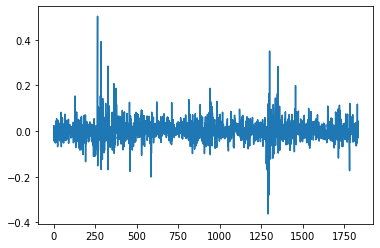

In [33]:
dataset['RS GOL'].plot(); # Gráfico com as taxas de retorno diárias.

In [34]:
dataset['RS GOL'].mean() # Retorno médio diário.

0.0011607525257624522

In [35]:
# Também é possível realizar o cálculo de Retorno Simples por ano, exemplo 2015: 

dataset.head(246) # Temos em média 246 dias úteis

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
241,2015-12-22,2.49,12.35,5.950000,0.042500,10.313737,42.230000,-0.110714
242,2015-12-23,2.46,12.48,5.980769,0.046093,10.646438,42.750000,-0.012048
243,2015-12-28,2.39,12.45,6.061538,0.063281,10.430182,42.500000,-0.028455
244,2015-12-29,2.39,13.10,5.992307,0.070117,10.430182,42.419998,0.000000


In [36]:
(dataset['RS GOL'].mean() * 246) * 100 # Retorno médio anual.

28.554512133756322

In [37]:
# Faremos este mesmo processo para as demais ações do dataset.

dataset['RS CVC'] = (dataset['CVC'] / dataset['CVC'].shift(1)) - 1
dataset['RS WEGE'] = (dataset['WEGE'] / dataset['WEGE'].shift(1)) - 1
dataset['RS MGLU'] = (dataset['MGLU'] / dataset['MGLU'].shift(1)) - 1
dataset['RS TOTS'] = (dataset['TOTS'] / dataset['TOTS'].shift(1)) - 1
dataset['RS BOVA'] = (dataset['BOVA'] / dataset['BOVA'].shift(1)) - 1

In [38]:
dataset.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477


In [39]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,2022-05-13,14.51,13.06,26.500000,4.380000,26.459999,103.290001,0.117874,0.097479,0.003408,0.047847,0.038869,0.012250
1829,2022-05-16,14.61,13.06,26.200001,4.380000,26.120001,104.400002,0.006892,0.000000,-0.011321,0.000000,-0.012850,0.010746
1830,2022-05-17,15.27,13.05,26.910000,3.940000,26.690001,104.900002,0.045175,-0.000766,0.027099,-0.100457,0.021822,0.004789
1831,2022-05-18,14.80,12.59,26.430000,3.720000,26.459999,102.209999,-0.030779,-0.035249,-0.017837,-0.055838,-0.008618,-0.025643


In [40]:
(dataset['RS CVC'].mean() * 246) * 100

13.782859229921701

In [41]:
(dataset['RS WEGE'].mean() * 246) * 100

25.691697970124288

In [42]:
(dataset['RS MGLU'].mean() * 246) * 100 

57.83336868966054

In [43]:
(dataset['RS TOTS'].mean() * 246) * 100 

18.325443822392625

In [44]:
(dataset['RS BOVA'].mean() * 246) * 100

13.860237295620365

#### Taxa de Retorno Logarítmica:

In [45]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 14.899999618530272)

In [46]:
np.log(dataset['GOL'][len(dataset) - 1] / dataset['GOL'][0]) * 100

-0.6022109496119914

In [47]:
np.log(dataset['CVC'][len(dataset) - 1] / dataset['CVC'][0]) * 100

-18.75985710710772

In [48]:
np.log(dataset['WEGE'][len(dataset) - 1] / dataset['WEGE'][0]) * 100

146.0998323803384

In [49]:
np.log(dataset['MGLU'][len(dataset) - 1] / dataset['MGLU'][0]) * 100

277.3932246946392

In [50]:
np.log(dataset['TOTS'][len(dataset) - 1] / dataset['TOTS'][0]) * 100

81.0218063053621

In [52]:
np.log(dataset['BOVA'][len(dataset) - 1] / dataset['BOVA'][0]) * 100

77.98411673044264

In [53]:
dataset['RL GOL'] = np.log(dataset['GOL'] / dataset['GOL'].shift(1))
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.009383
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.023953
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,-0.044362
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.019432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,2022-05-13,14.51,13.06,26.500000,4.380000,26.459999,103.290001,0.117874,0.097479,0.003408,0.047847,0.038869,0.012250,0.111428
1829,2022-05-16,14.61,13.06,26.200001,4.380000,26.120001,104.400002,0.006892,0.000000,-0.011321,0.000000,-0.012850,0.010746,0.006868
1830,2022-05-17,15.27,13.05,26.910000,3.940000,26.690001,104.900002,0.045175,-0.000766,0.027099,-0.100457,0.021822,0.004789,0.044184
1831,2022-05-18,14.80,12.59,26.430000,3.720000,26.459999,102.209999,-0.030779,-0.035249,-0.017837,-0.055838,-0.008618,-0.025643,-0.031263


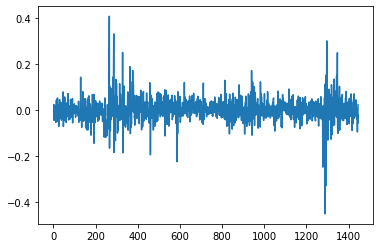

In [ ]:
dataset['RL GOL'].plot();

In [ ]:
dataset['RL GOL'].mean()

4.814592658372116e-05

In [ ]:
(dataset['RL GOL'].mean() * 246) * 100

1.1843897939595405

In [ ]:
dataset['RL CVC'] = np.log(dataset['CVC'] / dataset['CVC'].shift(1))
dataset['RL WEGE'] = np.log(dataset['WEGE'] / dataset['WEGE'].shift(1))
dataset['RL MGLU'] = np.log(dataset['MGLU'] / dataset['MGLU'].shift(1))
dataset['RL TOTS'] = np.log(dataset['TOTS'] / dataset['TOTS'].shift(1))
dataset['RL BOVA'] = np.log(dataset['BOVA'] / dataset['BOVA'].shift(1))

In [ ]:
dataset.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL,RL CVC,RL WEGE,RL MGLU,RL TOTS,RL BOVA
0,2015-01-02,14.99,15.20,11.8462,0.232812,35.732101,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,15.00,11.9269,0.237187,34.634201,46.320000,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890,-0.009383,-0.013245,0.006789,0.018618,-0.031208,-0.020090
2,2015-01-06,15.21,14.80,11.7500,0.234062,32.468300,46.580002,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613,0.023953,-0.013423,-0.014943,-0.013263,-0.064577,0.005597
3,2015-01-07,14.55,14.67,11.6154,0.241875,32.238701,48.150002,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705,-0.044362,-0.008823,-0.011521,0.032835,-0.007097,0.033150
4,2015-01-08,14.27,14.15,11.8115,0.240000,32.987301,48.509998,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477,-0.019432,-0.036090,0.016742,-0.007782,0.022955,0.007449


In [ ]:
(dataset['RL CVC'].mean() * 246) * 100

-3.4386770818897343

In [ ]:
(dataset['RL WEGE'].mean() * 246) * 100

32.23118770450791

In [ ]:
(dataset['RL MGLU'].mean() * 246) * 100

79.82186824649435

In [ ]:
(dataset['RL TOTS'].mean() * 246) * 100

-4.193884504739398

In [ ]:
(dataset['RL BOVA'].mean() * 246) * 100

11.41594922604043

#### Retorno de Carteira de Ações:

In [55]:
dataset = pd.read_csv('https://github.com/mharcoshungria/python_for_finance/raw/main/datasets/acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1828,2022-05-13,14.51,13.06,26.500000,4.380000,26.459999,103.290001
1829,2022-05-16,14.61,13.06,26.200001,4.380000,26.120001,104.400002
1830,2022-05-17,15.27,13.05,26.910000,3.940000,26.690001,104.900002
1831,2022-05-18,14.80,12.59,26.430000,3.720000,26.459999,102.209999


In [56]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [57]:
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1828,2022-05-13,0.967979,0.859211,4.474027,18.813464,2.221531,2.185569
1829,2022-05-16,0.974650,0.859211,4.423377,18.813464,2.192986,2.209056
1830,2022-05-17,1.018679,0.858553,4.543247,16.923526,2.240842,2.219636
1831,2022-05-18,0.987325,0.828289,4.462208,15.978558,2.221531,2.162717


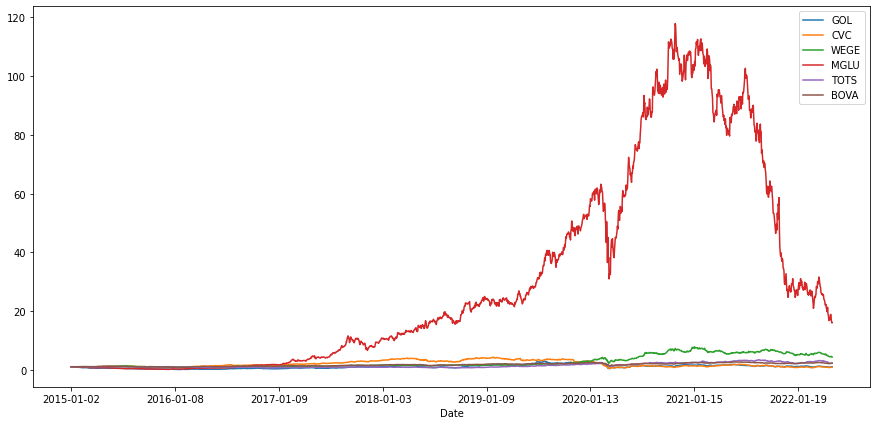

In [58]:
dataset_normalizado.plot(x = 'Date', figsize=(15, 7));

In [59]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [61]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477


In [62]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

GOL     0.285545
CVC     0.137829
WEGE    0.256917
MGLU    0.578334
TOTS    0.183254
BOVA    0.138602
dtype: float64

In [63]:
retorno_anual = retorno_anual * 100
retorno_anual

GOL     28.554512
CVC     13.782859
WEGE    25.691698
MGLU    57.833369
TOTS    18.325444
BOVA    13.860237
dtype: float64

In [65]:
pesos_carteira1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [66]:
pesos_carteira1.sum()

1.0

In [67]:
np.dot(retorno_anual, pesos_carteira1)

28.837576369171117

In [68]:
pesos_carteira2 = np.array([0.1, 0.2, 0.2, 0.4, 0.1, 0.0])

In [69]:
pesos_carteira2.sum()

1.0

In [70]:
np.dot(retorno_anual, pesos_carteira2)

35.71625451148832

#### Gráfico da Carteira x BOVA:

In [71]:
dataset = pd.read_csv('https://github.com/mharcoshungria/python_for_finance/raw/main/datasets/acoes.csv')

In [72]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])
dataset_normalizado.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449


In [73]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['GOL'] + dataset_normalizado['CVC'] + dataset_normalizado['WEGE'] + dataset_normalizado['MGLU'] + dataset_normalizado['TOTS']) / 5
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.994477
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,0.978854
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,0.971492
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,0.966805
...,...,...,...,...,...,...,...,...
1828,2022-05-13,0.967979,0.859211,4.474027,18.813464,2.221531,2.185569,5.467242
1829,2022-05-16,0.974650,0.859211,4.423377,18.813464,2.192986,2.209056,5.452737
1830,2022-05-17,1.018679,0.858553,4.543247,16.923526,2.240842,2.219636,5.116969
1831,2022-05-18,0.987325,0.828289,4.462208,15.978558,2.221531,2.162717,4.895582


In [75]:
figura = px.line(title = 'Comparativo Carteira x BOVA:')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

In [76]:
dataset_normalizado.drop(['GOL', 'WEGE', 'CVC', 'MGLU', 'TOTS'], axis = 1, inplace= True)
dataset_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.994477
2,2015-01-06,0.985612,0.978854
3,2015-01-07,1.018832,0.971492
4,2015-01-08,1.026449,0.966805
...,...,...,...
1828,2022-05-13,2.185569,5.467242
1829,2022-05-16,2.209056,5.452737
1830,2022-05-17,2.219636,5.116969
1831,2022-05-18,2.162717,4.895582


In [78]:
figura = px.line(title = 'Comparativo Carteira x BOVA:')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

#### Exercício:

##### Taxa de Retorno da Carteira:

In [89]:
dataset = pd.read_csv('https://github.com/mharcoshungria/python_for_finance/raw/main/datasets/acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1828,2022-05-13,14.51,13.06,26.500000,4.380000,26.459999,103.290001
1829,2022-05-16,14.61,13.06,26.200001,4.380000,26.120001,104.400002
1830,2022-05-17,15.27,13.05,26.910000,3.940000,26.690001,104.900002
1831,2022-05-18,14.80,12.59,26.430000,3.720000,26.459999,102.209999


In [90]:
acoes_df_normalizado = dataset.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = (acoes_df_normalizado[i] / acoes_df_normalizado[i][0])

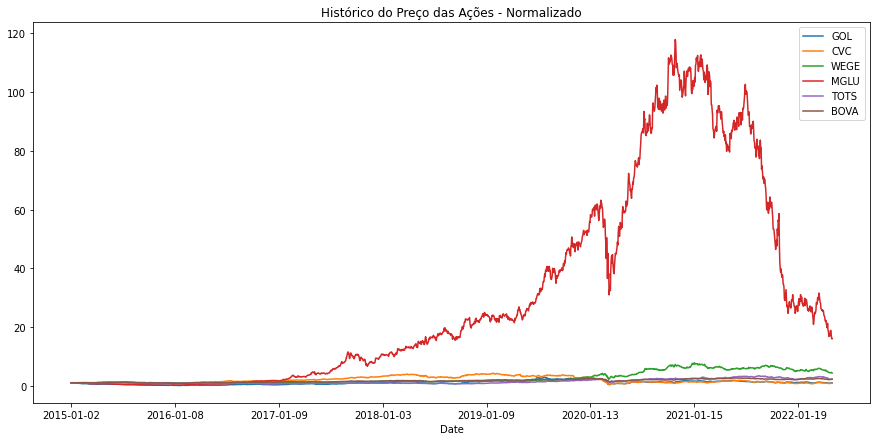

In [103]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do Preço das Ações - Normalizado');

In [92]:
acoes_df_normalizado.drop(labels = ['Date'], axis = 1, inplace = True)

In [93]:
retorno_carteira = (acoes_df_normalizado / acoes_df_normalizado.shift(1)) - 1
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477


In [94]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

GOL     0.285545
CVC     0.137829
WEGE    0.256917
MGLU    0.578334
TOTS    0.183254
BOVA    0.138602
dtype: float64

In [95]:
retorno_anual = retorno_anual * 100
retorno_anual

GOL     28.554512
CVC     13.782859
WEGE    25.691698
MGLU    57.833369
TOTS    18.325444
BOVA    13.860237
dtype: float64

In [96]:
pesos_carteira = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [97]:
np.dot(retorno_anual, pesos_carteira)

28.837576369171117

##### Gráfico Carteira x BOVA:

In [104]:
dataset = pd.read_csv('https://github.com/mharcoshungria/python_for_finance/raw/main/datasets/acoes_ex.csv')

In [105]:
acoes_df_normalizado = dataset.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = (acoes_df_normalizado[i] / acoes_df_normalizado[i][0])

In [106]:
dataset.columns

Index(['Date', 'AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BBRASIL', 'BOVA'], dtype='object')

In [108]:
acoes_df_normalizado['CARTEIRA'] = (acoes_df_normalizado['AMBEV'] + acoes_df_normalizado['ODONTOPREV'] + acoes_df_normalizado['VIVO'] + acoes_df_normalizado['PETROBRAS'] + acoes_df_normalizado['BBRASIL']) / 5
acoes_df_normalizado

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110,0.977377
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612,0.976579
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832,1.006405
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449,1.026926
...,...,...,...,...,...,...,...,...
1828,2022-05-13,0.907615,1.066169,1.302485,4.070000,1.550110,2.185569,1.779276
1829,2022-05-16,0.916979,1.056563,1.307774,4.184444,1.550110,2.209056,1.803174
1830,2022-05-17,0.919476,1.070438,1.318879,4.187778,1.608389,2.219636,1.820992
1831,2022-05-18,0.887640,1.057631,1.310682,4.093333,1.585430,2.162717,1.786943


In [110]:
figura = px.line(title = 'Histórico do Preço das Ações:')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()

In [111]:
acoes_df_normalizado.drop(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BBRASIL'], axis = 1, inplace = True)
acoes_df_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.977377
2,2015-01-06,0.985612,0.976579
3,2015-01-07,1.018832,1.006405
4,2015-01-08,1.026449,1.026926
...,...,...,...
1828,2022-05-13,2.185569,1.779276
1829,2022-05-16,2.209056,1.803174
1830,2022-05-17,2.219636,1.820992
1831,2022-05-18,2.162717,1.786943


In [113]:
figura = px.line(title = 'Histórico do Preço das Ações:')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()